<a href="https://colab.research.google.com/github/AliAramideh/Predicting_Heating_Load-of_a_Building/blob/main/Predicting_Heating_Load_of_a_Building_using_Linear_Regression_without_using_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center">An Introduction to Machine Learning - 25737</h1>
<h4 align="center">Dr. Sajjad Amini</h4>
<h4 align="center">Sharif University of Technology, Spring 2023</h4>

**Student Name**:

**Student ID**:

# Linear Regression

In this exercise, we want to examine **linear regression**. For this purpose, we have prepared a dataset in the `q1.csv` file. This dataset is used to estimate the **heating load** and **cooling load** of a building based on its parameters. The parameters in this dataset are explained below:

- $X_1$: Relative Compactness
- $X_2$: Surface Area
- $X_3$: Wall Area
- $X_4$: Roof Area
- $X_5$: Overall Height
- $X_6$: Orientation
- $X_7$: Glazing Area
- $X_8$: Glazing Area Distribution
- $Y_1$: Heating Load
- $Y_2$: Cooling Load

**Note**: For the sake of simplicity, we will only focus on estimating the **heating load** in this problem. Also, please note that we have some inline questions in this notebook, for which you should write your answers in the **Answer** section below each question.

## Importing Libraries

First we import libraries that we need for this assignment.

**Attention**: You should only use these libraries. Other libraries are not acceptable.

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading Data and Preprocessing

In this section, we want to read data from a CSV file and then preprocess it to make it ready for the rest of the problem.

First, we read the data in the cell below and extract an $m \times n$ matrix, $X$, and an $m \times 1$ vector, $Y$, from it, which represent our knowledge about the building (`X1`, `X2`, ..., `X8`) and heating load (`Y1`), respectively. Note that by $m$, we mean the number of data points and by $n$, we mean the number of features.

In [168]:
url = 'https://github.com/AliAramideh/Predicting_Heating_Load-of_a_Building/raw/main/HeatingLoadOfBulding.csv'
dataset = pd.read_csv(url)

# Rename columns of dataset to the best name that we know
dataset = dataset.rename(columns={'X1' : 'RelativeCompactness',
                                  'X2' : 'SurfaceArea',
                                  'X3': 'WallArea',
                                  'X4' : 'RoofArea',
                                  'X5' : 'OverallHeight',
                                  'X6' : 'Orientation',
                                  'X7' : 'GlazingArea',
                                  'X8' : 'GlazingAreaDistribution',
                                  'Y1' : 'HeatingLoad',
                                  'Y2' : 'CoolingLoad'})
dataset

,RelativeCompactness,SurfaceArea,WallArea,RoofArea,OverallHeight,Orientation,GlazingArea,GlazingAreaDistribution,HeatingLoad,CoolingLoad
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [169]:
X, Y = None, None

# Initialaizing m, n:
m = len(dataset.index)
n = len(dataset.columns) - 2

X = dataset.iloc[:, :n].values
Y = dataset.iloc[:, n:n+2].values

print(X.shape)
print(Y.shape)

(768, 8)
(768, 2)


Next, we should normalize our data. For normalizing a vector $\mathbf{x}$, a very common method is to use this formula:

$$
\mathbf{x}_{norm} = \dfrac{\mathbf{x} - \overline{\mathbf{x}}}{\sigma_\mathbf{x}}
$$

Here, $\overline{x}$ and $\sigma_\mathbf{x}$ denote the mean and standard deviation of vector $\mathbf{x}$, respectively. Use this formula and store the new $X$ and $Y$ vectors in the cell below.

**Question**: Briefly explain why we need to normalize our data before starting the training.

**Answer**:The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values; normalization can help training of our neural networks as the different features are on a similar scale, which helps to stabilize the gradient descent step, allowing us to use larger learning rates or help models converge faster for a given learning rate

In [170]:
X_mean = np.mean(X, axis=0)
X_std_dev = np.std(X, axis=0)

Y_mean = np.mean(Y, axis=0)
Y_std_dev = np.std(Y, axis=0)

# Normalizing
X_norm = (X - X_mean)/X_std_dev
X = X_norm

Y_norm = (Y - Y_mean)/Y_std_dev
Y = Y_norm

Finally, we should add a column of $1$s at the beginning of $X$ to represent the bias term. Do this in the next cell. Note that after this process, $X$ should be an $m \times (n+1)$ matrix.

In [171]:
ones_vec = np.ones(m)
X = np.column_stack((X, ones_vec))

print(X.shape)

(768, 9)


## Training Model Using Direct Method

We know that the loss function in linear regression is defined as:

$$
\mathcal{L}(\mathbf{w}) = \frac{1}{m}\sum_{i=1}^{m}(\mathbf{w}^\top\mathbf{x}_i-y_i)^2
$$

Here, $w$ is the weight vector and $(x_i, y_i)$ represents the $i$th data point. First, write a function that takes $X$, $Y$, and $w$ as inputs and returns the loss value in the next cell. Note that your implementation should be fully vectorized, meaning that you are not allowed to use any loops in your function and should only use functions prepared in the numpy library.

In [172]:
def loss(X, Y, w):
  '''
  X: an m by (n+1) matrix which includes inputs
  Y: an m by 1 vector which includes heating loads
  w: an (n+1) by 1 weight vector
  '''
  m, n = X.shape
  loss = None

  Y_pred = X @ w

  sum_squared = (Y - Y_pred) ** 2
  MSE = np.mean(sum_squared)
  loss = MSE

  return loss

Now, we want to calculate the weight matrix, $w$, using the direct method. By direct method, we mean finding the answer to the optimization problem below directly using linear algebra, without using iterative methods:

$$
\min_{w} \mathcal{L}(w)
$$

Question: What is the answer to this problem in terms of $X$ and $Y$?

Answer:To find the optimal value of w that minimizes L(w), we can take the derivative of L(w) with respect to w and set it equal to zero:

$$ \frac{dL}{dw} = 2X^T(Xw - Y) = 0 $$

Solving for w gives us:

$$ w = (X^T X)^{-1} X^TY $$

This formula gives us the weight matrix that minimizes the loss function and provides the best fit for our linear regression model.

Now you should implement a function that receives $X$ and $Y$ as input and returns $w$. Note that your implementation should also be fully vectorized.

In [173]:
def direct_method(X, Y):
  '''
  X: an m by (n+1) matrix which includes inputs
  Y: an m by 1 vector which includes heating loads
  '''
  w = None
  w = np.linalg.inv(X.T @ X) @ X.T @ Y

  return w

Finally, we want to evaluate our loss for this problem. Run the cell below to calculate the loss of your model.

In [174]:
w = direct_method(X, Y) # calculating w using direct method
print(f"loss for this problem using direct method is {loss(X, Y, w)}")

loss for this problem using direct method is 0.09902105768477039


## Training Model Using Gradient Descent

Now, instead of using the direct method to calculate $w$, we want to use the **Gradient Descent** algorithm. We know that in this algorithm, in each iteration, we should update our weight vector with:

$$
\mathbf{w}^{(t+1)} = \mathbf{w}^{(t)} - \alpha \nabla \mathcal{L}(\mathbf{w}^{(t)})
$$

Here, $w^{t}$ represents the weight matrix in the $t$th iteration, and $\alpha$ represents the learning rate.

**Question**: Write an expression for $\nabla\mathcal{L}(\mathbf{w})$.

**Answer**:
$$\nabla\mathcal{L}(\mathbf{w}) = \frac{2}{m} \mathbf{X}^\top (\mathbf{X}\mathbf{w} - \mathbf{y})$$

Now, write a function that computes the gradient of $\mathcal{L}(\mathbf{w})$. This function should receive $X$, $Y$, and $\mathbf{w}$ as inputs and return an $(n+1) \times 1$ vector, which represents $\nabla\mathcal{L}(\mathbf{w})$. Note that your implementation should also be **fully vectorized**.

In [175]:
def gradient(X, Y, w):
  '''
  X: an m by (n+1) matrix which includes inputs
  Y: an m by 1 vector which includes heating loads
  w: an (n+1) by 1 weight vector
  '''
  m, n = X.shape
  grad = None
  grad = (2/m) * X.T @ (np.dot(X,w)-Y)
  return grad

Now, we are ready to implement the Gradient Descent algorithm. Complete the function below for this purpose. Note that this function receives $X$, $Y$, the learning rate, and the number of iterations as inputs. This function should return two parameters. The first parameter is $\mathbf{w}$, and the second parameter is a `numpy` array that contains the loss in each iteration. This array is indicated by `loss_history` in the code. Also note that you should initialize $\mathbf{w}$ with the `randn` function.

In [176]:
def gradient_descent(X, Y, alpha, num_iter):
  '''
  X: an m by (n+1) matrix which includes inputs
  Y: an m by 1 vector which includes heating loads
  alpha: learning rate
  num_iter: number of iterations of the algorithm
  '''
  m, n = X.shape
  loss_history = []
  w = np.random.randn(2 * n).reshape(n, 2)

  for i in range(num_iter):
    w -= alpha * gradient(X, Y, w)
    loss_history.append(loss(X, Y, w))

  return w, loss_history

Now, run the `gradient_descent` function for 5 different values of the learning rate. Plot the `loss_history` of these 5 different values in the same figure.

**Question**: Discuss the effect of the learning rate and find the best value of this parameter.

**Answer**:The learning rate is a hyperparameter in gradient descent that determines the step size at each iteration while moving towards a minimum of a loss function. The effect of the learning rate on the performance of gradient descent is significant, as it can affect both the speed and accuracy of convergence.


If the learning rate is too small, the algorithm will take longer to converge, as it will take many small steps to reach the minimum. On the other hand, if the learning rate is too large, the algorithm may overshoot or oscillate around the minimum, leading to slower convergence or even divergence.


Therefore, finding the best value for the learning rate is crucial for achieving optimal performance in gradient descent. One common approach is to start with a relatively large learning rate and gradually decrease it over time as convergence approaches. This approach is known as learning rate annealing.

In practice, there is no one-size-fits-all solution for determining the best value of the learning rate. It often requires experimentation and tuning based on factors such as data complexity and model architecture. However, a good starting point for many problems is typically between 0.01 and 0.1.

<Axes: >

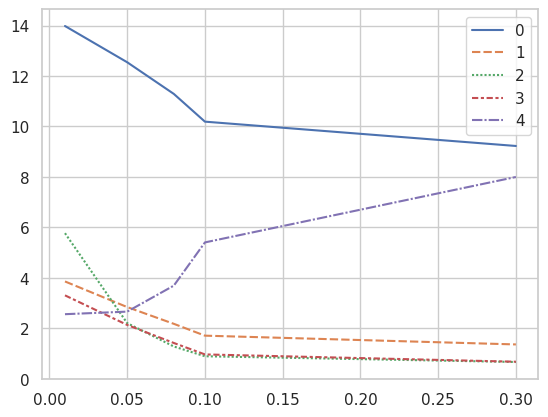

In [182]:
alpha_set = [0.01, 0.05, 0.08, 0.1, 0.3]
num_iter = 5
loss_history_set =[]

for alpha in alpha_set:
  w, loss_history = gradient_descent(X, Y, alpha, num_iter)
  loss_history_set.append(loss_history)

loss_history_set = np.array(loss_history_set)
# sns.lineplot(loss_history_set)
Loss = pd.DataFrame(data = loss_history_set)
Loss.columns = alpha_set
Loss = Loss.transpose()
sns.lineplot(Loss)
# plt.plot(alpha, loss_history_set)
# plt.show()

## Conclusion

Compare the answer of two different methods that we used earlier.

**Question**: Discuss these two methods and compare them with each other. When is it better to use the direct method, and when is it better to use Gradient Descent?

**Answer**:The direct method is often faster than Gradient Descent for small datasets with few features. It can also be more accurate since it finds the exact solution to the optimization problem. However, it can be computationally expensive and impractical for large datasets with many features.


Gradient Descent, on the other hand, is more scalable and efficient for large datasets with many features. It also allows for online learning, where new data can be incorporated into the model as it becomes available. However, it may converge to a suboptimal solution if the learning rate is not chosen carefully or if there are local minima in the loss function.


In general, it is better to use the direct method when dealing with small datasets or when accuracy is paramount. Gradient Descent is better suited for large datasets or when scalability and efficiency are important considerations.


Ultimately, the choice between these two methods depends on various factors such as dataset size, complexity of features, computational resources available, and desired level of accuracy.